# BPL_TEST2_Fedbatch - demo

In [1]:
run -i BPL_TEST2_Fedbatch_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

No processDiagram.png file in the FMU, but try the file on disk.


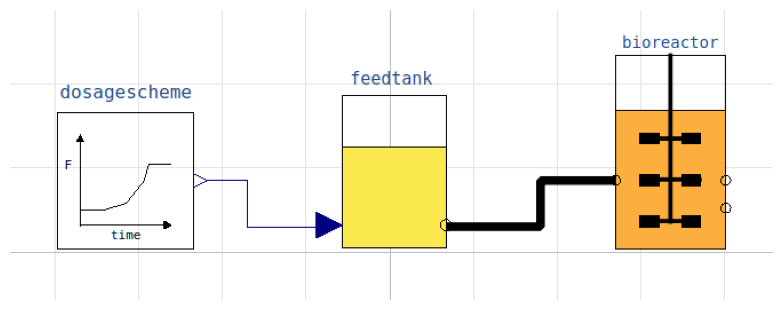

In [3]:
process_diagram()

disp('dosagescheme')

In [4]:
#disp('feedtank')

In [5]:
#disp('bioreactor', mode='long')

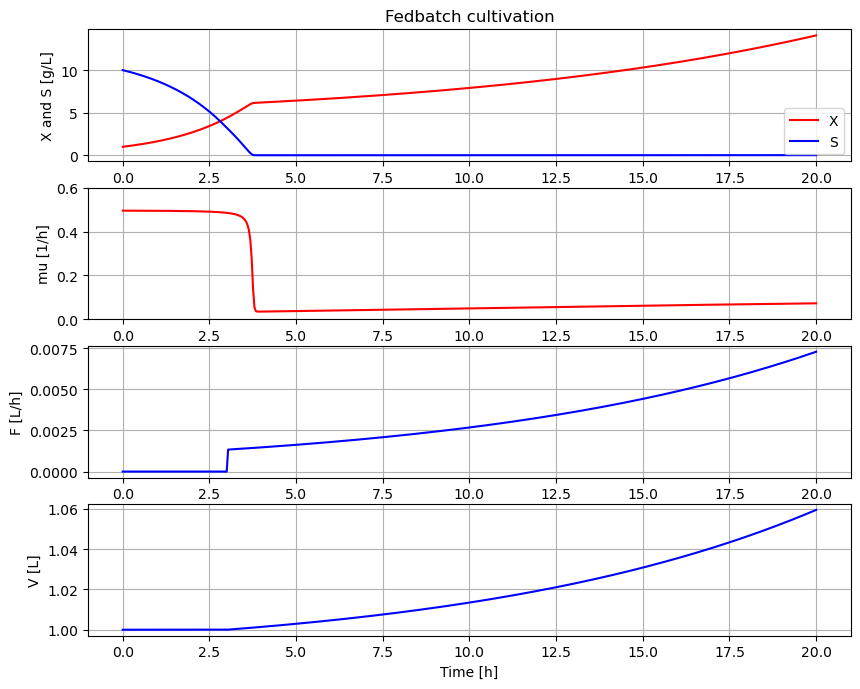

In [6]:
# Simulation with default values of the process
newplot(plotType='TimeSeries'); ax2.set_ylim(0,0.6)

simu(20)

In [7]:
# Let us display and then save the feedprofile
disp('dosagescheme')

F_start : 0.0
mu_feed : 0.1
t_startExp : 3.0
F_startExp : 0.001
F_max : 0.3


In [8]:
feedprofile_1={'F_start':0, 'mu_feed':0.1, 't_startExp':3, 'F_startExp':0.001, 'F_max':0.3}

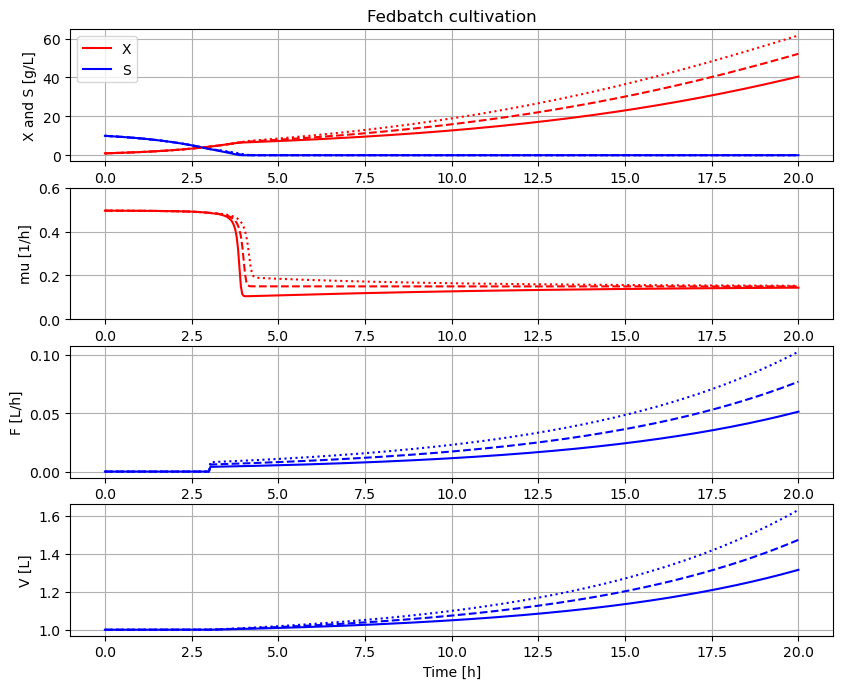

In [9]:
# Let us develop a feedprofile with mu_feed=0.15 1/h instead
newplot(plotType='TimeSeries'); ax2.set_ylim(0,0.6)

# Choose mu_feed
par(mu_feed=0.15)

# Tune F_startExp value to get a stable culture growth rate at mu 0.15 1/h
for value in [0.004, 0.006, 0.008]:
    par(F_startExp=value)
    simu(20)

In [10]:
# We choose F_startExp = 0.008 and save the new feedprofile
feedprofile_2={'F_start':0, 'mu_feed':0.15, 't_startExp':3, 'F_startExp':0.006, 'F_max':0.3}

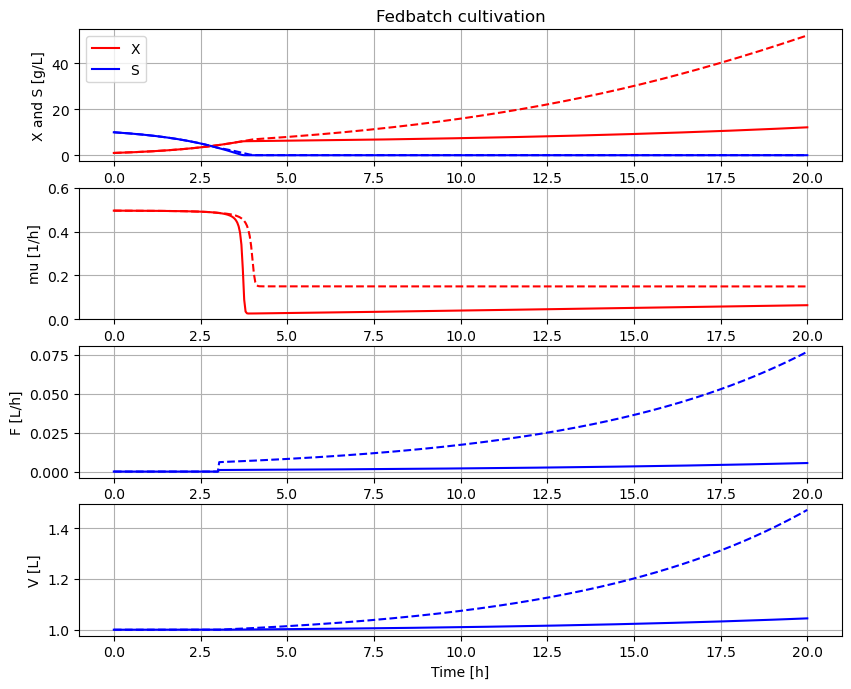

In [11]:
# Compare the result of ot the two
newplot(plotType='TimeSeries'); ax2.set_ylim(0,0.6)

for feedprofile in [feedprofile_1, feedprofile_2]:
    par(feedprofile)
    simu(20)

# Restore the original feedprofile
par(feedprofile_2)

In [12]:
describe('mu')

Cell specific growth rate variable : 0.15 [ 1/h ]


In [13]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'dosagescheme', 'feedtank', 'MSL']


In [14]:
describe('MSL')

MSL: RealInput, RealOutput


In [15]:
system_info()


System information
 -OS: Windows
 -Python: 3.12.11
 -Scipy: not installed in the notebook
 -PyFMI: 2.19.0
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: FMUModelCS2
 -Name: BPL.Examples_TEST2.Fedbatch
 -Generated: 2025-07-26T09:38:43
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.3.1
 -Interaction: FMU-explore version 1.0.2


In [16]:
!lsb_release -a

'lsb_release' is not recognized as an internal or external command,
operable program or batch file.
